<a href="https://colab.research.google.com/github/lluk4z/IF697-CienciaDeDados/blob/main/Projeto02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import io
import requests
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Importação do dataset

O dataset é composto pelo dataset do projeto 1 pré-processado apenas com as instâncias pertencentes a América do Sul.

Nesse projeto nós dividimos o dataset em clusters. A principio usamos a coluna de cluster para ser nossa variável alvo e classificarmos para qual cluster uma nova instancia pertenceria. Além disso, usamos o a label stringency_category como target  para o dataset todo e verificamos esse mesmo target para cada um dos clusters gerados.

In [ ]:
url = "https://raw.githubusercontent.com/lluk4z/IF697-CienciaDeDados/main/data_southAmerica.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
df.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_category,location
0,5.077265e+06,7759.666667,10035.476333,108848.666667,135.666667,226.762000,112339.374667,171.690000,222.044667,2408.381333,3.001667,5.017333,0.883333,0.0,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.5,5.0,76.67,0.845,0.0,Argentina
1,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.0,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.5,5.0,76.67,0.845,0.0,Argentina
2,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.0,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.5,5.0,76.67,0.845,0.0,Argentina
3,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.0,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.5,5.0,76.67,0.845,0.0,Argentina
4,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.0,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.5,5.0,76.67,0.845,0.0,Argentina


In [ ]:
location = df['location']
location

0       Argentina
1       Argentina
2       Argentina
3       Argentina
4       Argentina
          ...    
6519    Venezuela
6520    Venezuela
6521    Venezuela
6522    Venezuela
6523    Venezuela
Name: location, Length: 6524, dtype: object

In [ ]:
df = df.drop(columns=["location"])

df

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_category
0,5.077265e+06,7759.666667,10035.476333,108848.666667,135.666667,226.762000,112339.374667,171.690000,222.044667,2408.381333,3.001667,5.017333,0.883333,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.0,76.67,0.845,0.0
1,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.0,76.67,0.845,0.0
2,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.0,76.67,0.845,0.0
3,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.0,76.67,0.845,0.0
4,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.0,76.67,0.845,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,3.144800e+05,0.000000,751.714000,3733.000000,0.000000,12.000000,11059.243000,0.000000,26.435000,131.278000,0.000000,0.422000,1.040000,97.219997,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3.0
6520,3.164490e+05,1969.000000,924.000000,3764.000000,31.000000,14.000000,11128.486000,69.243000,32.494000,132.368000,1.090000,0.492000,1.070000,97.220002,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3.0
6521,3.173340e+05,885.000000,910.571000,3781.000000,17.000000,14.143000,11159.609000,31.123000,32.022000,132.966000,0.598000,0.497000,1.070000,97.220000,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3.0
6522,3.181850e+05,851.000000,867.143000,3789.000000,8.000000,13.571000,11189.536000,29.927000,30.495000,133.247000,0.281000,0.477000,1.068325,97.220000,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3.0


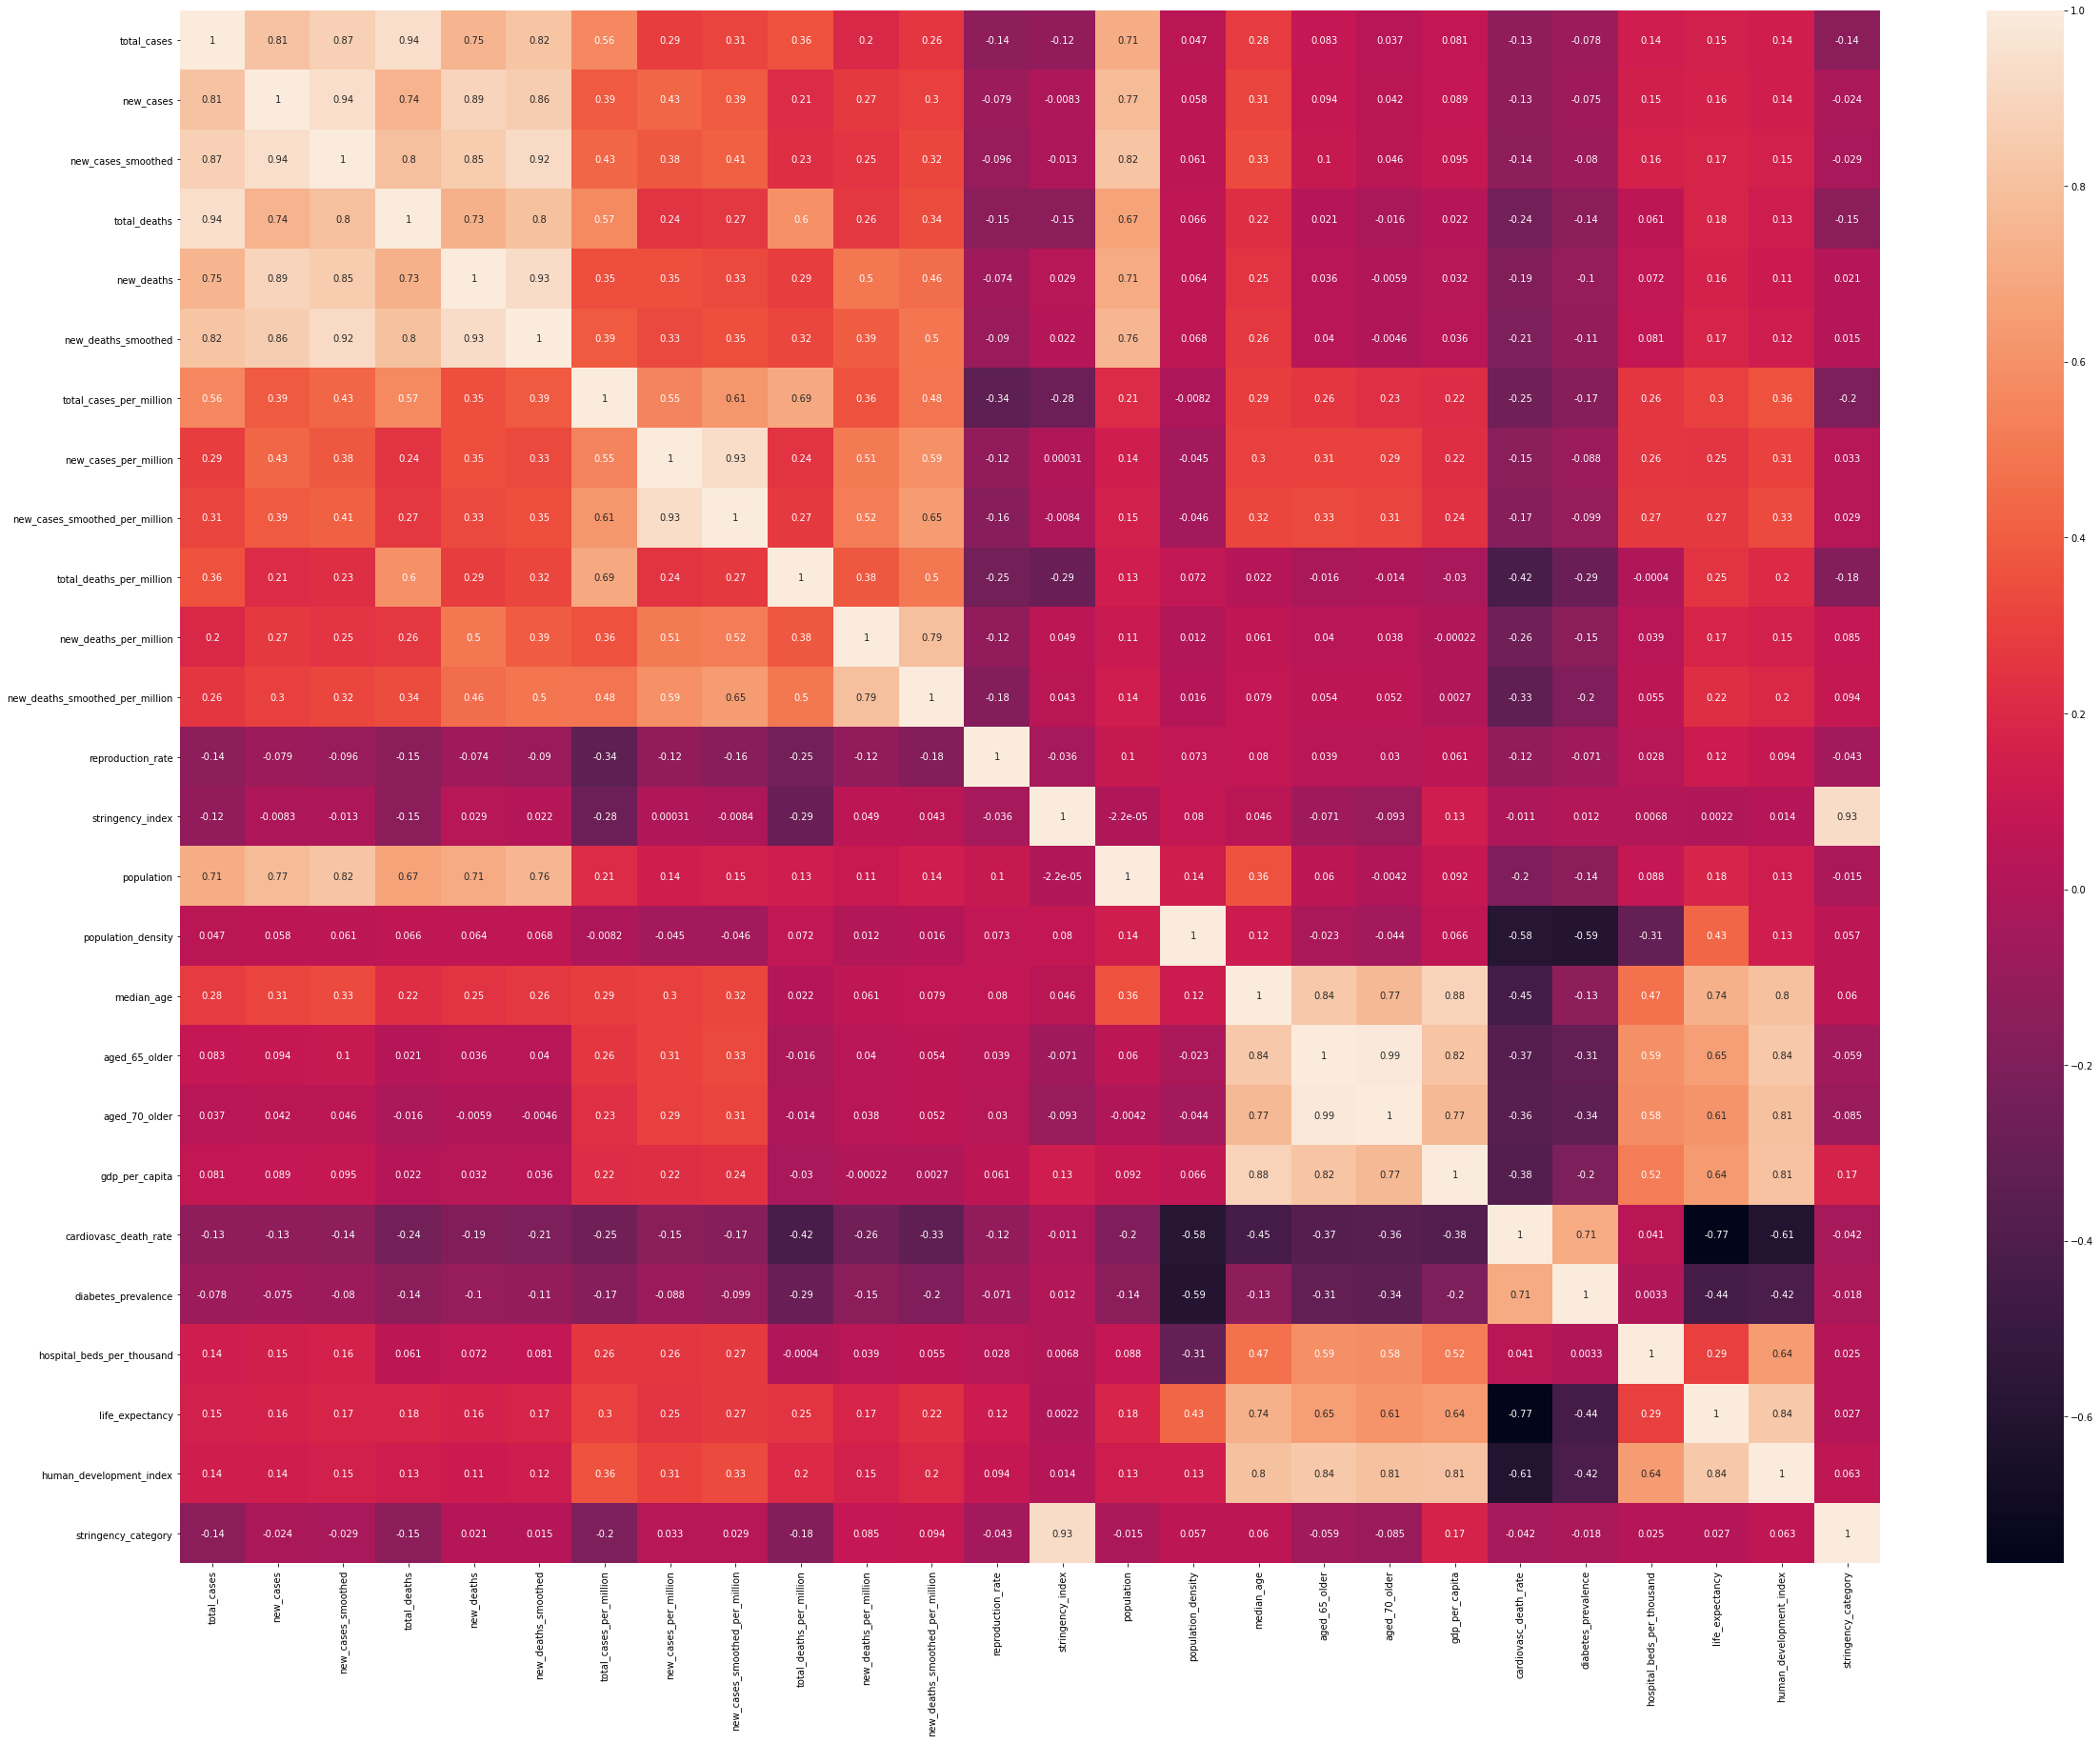

In [ ]:
correlation_matrix = df.corr()
ax = plt.subplots(figsize=(40,30))
sb.heatmap(correlation_matrix, annot=True)
plt.show()

## Visualização dos dados com redução de dimensionalidade

In [ ]:
df_2 = df
X = np.array(df_2)

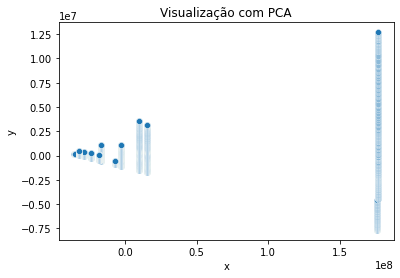

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2 dimensoes
pc = pca.fit_transform(X)

pca_df = pd.DataFrame(pc, columns=['x', 'y'])

sb.scatterplot(data=pca_df, x='x', y='y', palette='Dark2')
plt.title("Visualização com PCA")
plt.show()

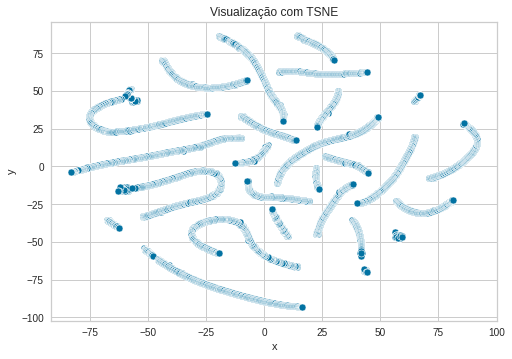

In [ ]:
from sklearn.manifold import TSNE
data = TSNE().fit_transform(X)

tsne_df = pd.DataFrame(data, columns=['x', 'y'])

sb.scatterplot(data=tsne_df, x='x', y='y')
plt.title("Visualização com TSNE")
plt.show()

## Curva Elbow

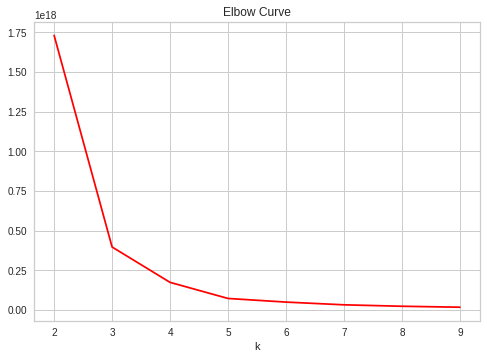

In [ ]:
from sklearn.cluster import KMeans

distorsions = []

for k in range(2, 10):
  model = KMeans(n_clusters=k)
  model.fit(X)
  distorsions.append(model.inertia_)

plt.plot(range(2,10), distorsions, color='red')
plt.grid(True)
plt.xlabel('k')
plt.title('Elbow Curve')
plt.show()

# K-means

O número de cluster ficou igual a 5 pois é onde começa ficar meio linear a curva de Elbow, além do gráfico de Silhouette Score não mostrar uma perda grande com 5 clusters.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init=20)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


In [ ]:
kmeans.fit(X)
y_pred_kmeans = kmeans.labels_
y_pred_kmeans

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

Visualizando os centróides dos grupos

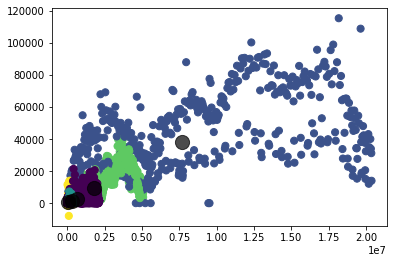

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)

Definimos a coluna target do dataset como cluster que são os clusters definidos pelo kmeans

In [ ]:
df_2.loc[:, 'cluster'] = y_pred_kmeans
df_2

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_category,cluster
0,5.077265e+06,7759.666667,10035.476333,108848.666667,135.666667,226.762000,112339.374667,171.690000,222.044667,2408.381333,3.001667,5.017333,0.883333,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.0,76.67,0.845,0.0,3
1,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.0,76.67,0.845,0.0,3
2,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.0,76.67,0.845,0.0,3
3,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.0,76.67,0.845,0.0,3
4,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.0,76.67,0.845,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,3.144800e+05,0.000000,751.714000,3733.000000,0.000000,12.000000,11059.243000,0.000000,26.435000,131.278000,0.000000,0.422000,1.040000,97.219997,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3.0,0
6520,3.164490e+05,1969.000000,924.000000,3764.000000,31.000000,14.000000,11128.486000,69.243000,32.494000,132.368000,1.090000,0.492000,1.070000,97.220002,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3.0,0
6521,3.173340e+05,885.000000,910.571000,3781.000000,17.000000,14.143000,11159.609000,31.123000,32.022000,132.966000,0.598000,0.497000,1.070000,97.220000,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3.0,0
6522,3.181850e+05,851.000000,867.143000,3789.000000,8.000000,13.571000,11189.536000,29.927000,30.495000,133.247000,0.281000,0.477000,1.068325,97.220000,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


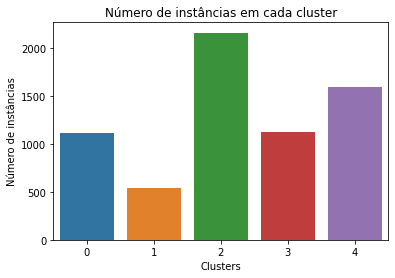

In [ ]:
sb.countplot(y_pred_kmeans)
plt.xlabel('Clusters')
plt.ylabel('Número de instâncias')
plt.title('Número de instâncias em cada cluster')
plt.show()

Percebemos que o dataset estava com as classes desbalanceadas, então usamos o algoritmo Smote para balancear.

### Balanceando as classes

O algoritmo Smote gera dados sintéticos das classes minoritárias a partir de vizinhos próximos

In [ ]:
smt = SMOTE()
X, y_pred_kmeans = smt.fit_sample(X, y_pred_kmeans)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


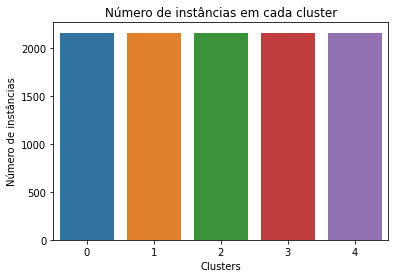

In [ ]:
sb.countplot(y_pred_kmeans)
plt.xlabel('Clusters')
plt.ylabel('Número de instâncias')
plt.title('Número de instâncias em cada cluster')
plt.show()

# Métricas de Avaliação

### Silhouette Score

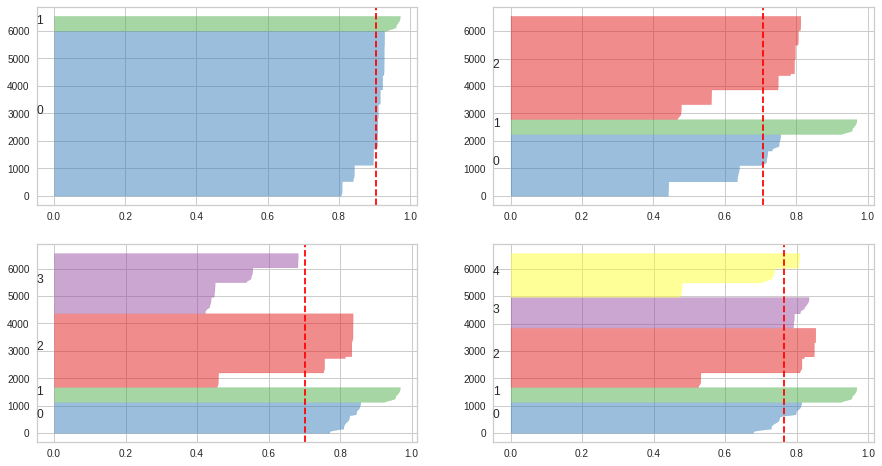

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in range(2, 6):
  kmeans = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
  q, mod = divmod(i, 2)

  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

# Classificação

Divisão dos dados em treino, validação e teste

In [ ]:
from sklearn.model_selection import train_test_split

X = df_2.drop(columns=['cluster'], axis=1)
y = df_2['cluster']

#20% dos dados para TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#20% dos dados para VALIDAÇÃO (0.25 * 0.8 = 0.2)
#60% dos dados para TREINAMENTO
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# MLFlow

## Configuração MLFlow

In [ ]:
!pip install optuna --quiet
!pip install mlflow --quiet
!pip install pyngrok --quiet

In [ ]:
# Data analysis library
import numpy as np
import pandas as pd
import joblib

# Machine Learning library
import sklearn
from sklearn.metrics import roc_curve, auc, accuracy_score, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric

# Model experimentation library
import mlflow
import mlflow.lightgbm
from mlflow.tracking import MlflowClient

# Hyperparameter tunning library
import optuna

# Plotting library
import matplotlib.pyplot as plt
# Prevent figures from displaying by turning interactive mode off using the function
plt.ioff()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
with mlflow.start_run(run_name="MLflow on Colab"):
  mlflow.log_metric("m1", 2.0)
  mlflow.log_param("p1", "mlflow-colab")

# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


# create remote tunnel using ngrok.com to allow local port access
# borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://41601542fd38.ngrok.io


In [ ]:
experiment_name = "experiments_v1"
artifact_repository = './mlflow-run'

# Provide uri and connect to your tracking server
mlflow.set_tracking_uri(ngrok_tunnel.public_url)

# Initialize client
client = MlflowClient()

# If experiment doesn't exist then it will create new
# else it will take the experiment id and will use to to run the experiments
try:
    # Create experiment 
    experiment_id = client.create_experiment(experiment_name, artifact_location=artifact_repository)
except:
    # Get the experiment id if it already exists
    experiment_id = client.get_experiment_by_name(experiment_name).experiment_id

t=2021-08-16T21:14:05+0000 lvl=warn msg="failed to open private leg" id=ec221893e205 privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"
2021/08/16 21:14:05 ERROR mlflow.utils.rest_utils: API request to https://41601542fd38.ngrok.io/api/2.0/mlflow/experiments/create failed with code 502 != 200, retrying up to 2 more times. API response body: 
<!doctype html5>
<html>
    <head>
        <style type="text/css">
         
        strong { font-weight: bold; }
        hr { -moz-box-sizing: content-box; box-sizing: content-box; height: 0; }
        html { font-family: sans-serif;   -ms-text-size-adjust: 100%;   -webkit-text-size-adjust: 100%;   } body { margin: 0; }
        a { background-color: transparent; }
        a:active, a:hover { outline: 0; }
        </style>

        <style type="text/css">
            body { background-color: #f5f5f5; }
            .container { width: 500px; margin: auto; color: #444; padding: 5px; }
            a, strong { color: pu

## Treino e rastreio com MLFlow 

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [ ]:
def model_experimentation(classifier, param, model_name, run_name, X_valid, y_valid):
    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        # Get run id 
        run_id = run.info.run_uuid
        
        mlflow.sklearn.autolog()
        
        # Perform model training
        clf = classifier(**param)
        clf.fit(X_train, y_train)

        # Perform model evaluation
        valid_prediction = clf.predict(X_valid) 
        acc = accuracy_score(y_valid, valid_prediction)
        
        # log metrics
        mlflow.log_metrics({"Validation_Accuracy": acc})

        # Plot and save metrics details    
        plot_confusion_matrix(clf, X_valid, y_valid, 
                              display_labels=[0,1,2,3],
                              cmap='magma')
        plt.title('Confusion Matrix')
        filename = f'./images/{model_name}_validation_confusion_matrix.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename) 

        return acc

# Seleção dos hiperparâmetros com optuna

Os quatro algoritmos escolhidos para classicação foram: RandomForestClassifier, KNN, Linear SVC e MLP

## Random Forest

In [ ]:
def objective_RF(trial):

    classifier = RandomForestClassifier
    param = {
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "max_depth": trial.suggest_int("max_depth", 2, 32, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500, step=100),
        "random_state": 0
    }
    model_name = 'rf'
    run_name = 'randomForest_model'

    accuracy = model_experimentation(classifier, param, model_name, run_name, X_valid, y_valid)
    return accuracy

[I 2021-08-16 21:14:28,404] A new study created in memory with name: no-name-98125545-e933-478d-87cb-1f5a53c3bbf2
[I 2021-08-16 21:14:34,070] Trial 0 finished with value: 1.0 and parameters: {'criterion': 'gini', 'max_depth': 31, 'n_estimators': 400}. Best is trial 0 with value: 1.0.
[I 2021-08-16 21:14:40,107] Trial 1 finished with value: 1.0 and parameters: {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 300}. Best is trial 0 with value: 1.0.
[I 2021-08-16 21:14:44,232] Trial 2 finished with value: 0.9149425287356322 and parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 200}. Best is trial 0 with value: 1.0.
[I 2021-08-16 21:14:49,565] Trial 3 finished with value: 0.9900383141762452 and parameters: {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 300}. Best is trial 0 with value: 1.0.
[I 2021-08-16 21:14:54,964] Trial 4 finished with value: 0.9149425287356322 and parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 500}. Best is trial 0 

RF - Accuracy: 1.0
RF - Best hyperparameters: {'criterion': 'gini', 'max_depth': 31, 'n_estimators': 400}


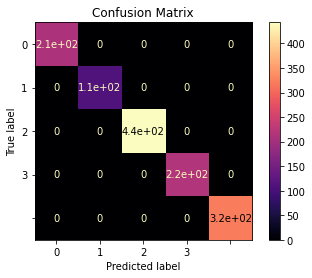

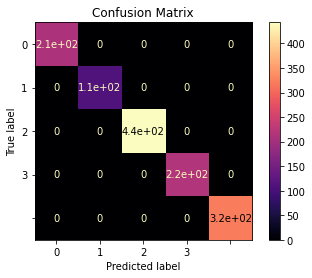

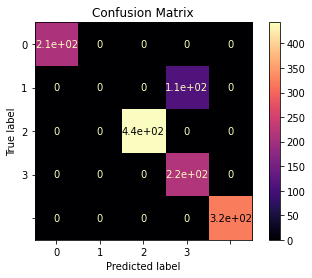

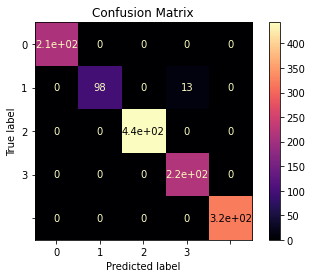

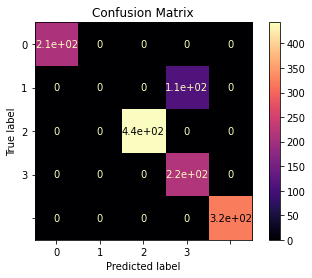

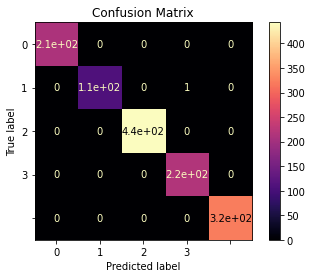

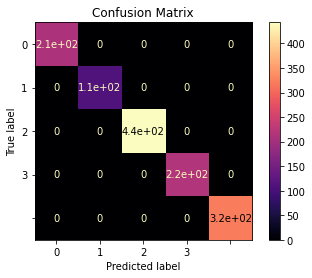

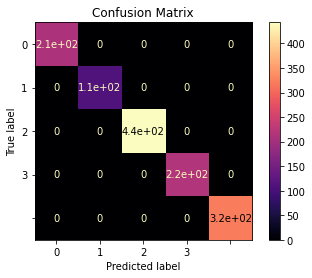

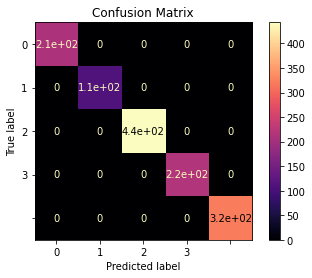

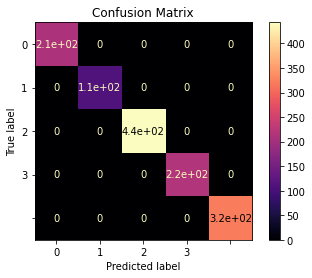

In [ ]:
study_RF = optuna.create_study(direction='maximize')
study_RF.optimize(objective_RF, n_trials=10)
trial_RF = study_RF.best_trial
print('RF - Accuracy: {}'.format(trial_RF.value))
print("RF - Best hyperparameters: {}".format(trial_RF.params))

## KNN

In [ ]:
def objective_KNN(trial):

    classifier = KNeighborsClassifier
    param = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 10, step=1,),
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        "algorithm": trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
    }
    model_name = 'KNN'
    run_name = 'KNN_model'

    accuracy = model_experimentation(classifier, param, model_name, run_name, X_valid, y_valid)
    return accuracy

[I 2021-08-16 21:16:29,967] A new study created in memory with name: no-name-af08f460-7881-4dd5-bd95-cc7aeaab2502
[I 2021-08-16 21:16:33,368] Trial 0 finished with value: 1.0 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'kd_tree'}. Best is trial 0 with value: 1.0.
[I 2021-08-16 21:16:36,492] Trial 1 finished with value: 1.0 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree'}. Best is trial 0 with value: 1.0.
[I 2021-08-16 21:16:39,628] Trial 2 finished with value: 1.0 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'auto'}. Best is trial 0 with value: 1.0.
[I 2021-08-16 21:16:42,740] Trial 3 finished with value: 1.0 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'auto'}. Best is trial 0 with value: 1.0.
[I 2021-08-16 21:16:46,032] Trial 4 finished with value: 1.0 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'kd_tree'}. Best is trial 0 with value: 1.0.
[I 2021-08

KNN - Accuracy: 1.0
KNN - Best hyperparameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'kd_tree'}


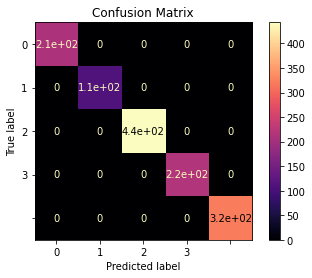

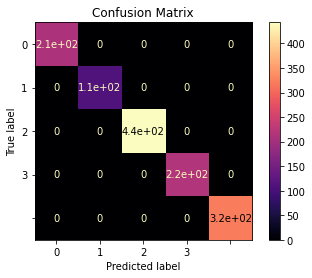

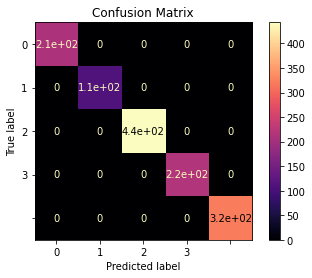

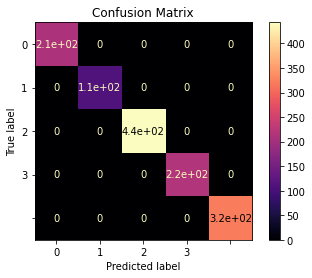

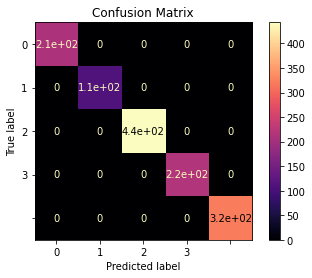

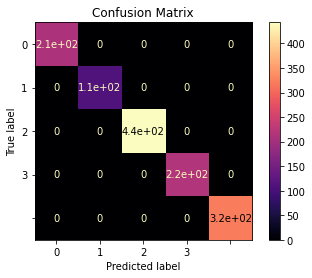

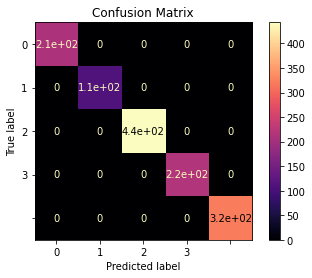

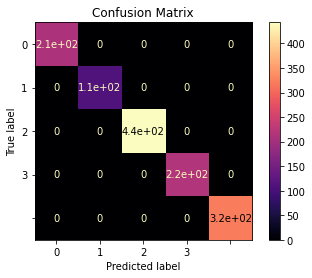

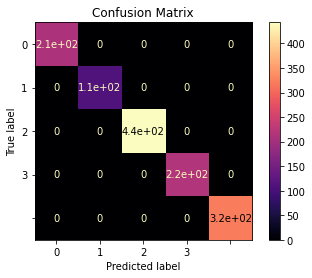

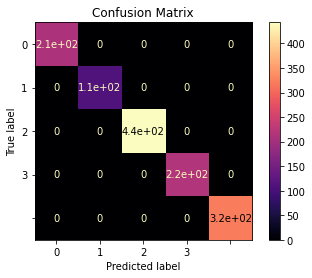

In [ ]:
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_KNN, n_trials=10)
trial_knn = study_knn.best_trial
print('KNN - Accuracy: {}'.format(trial_knn.value))
print("KNN - Best hyperparameters: {}".format(trial_knn.params))

## Linear SVC

In [ ]:
def objective_SVM(trial):

    classifier = LinearSVC
    param = {
        "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),
        "max_iter": trial.suggest_int("max_iter", 500, 2000, step=500),
        "multi_class": trial.suggest_categorical("multi_class", ["crammer_singer"]),
        "random_state": 0
    }
    model_name = 'SVM'
    run_name = 'SVM_model'

    accuracy = model_experimentation(classifier, param, model_name, run_name, X_valid, y_valid)
    return accuracy

In [ ]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_SVM, n_trials=5)
trial_svm = study_svm.best_trial
print('SVM - Accuracy: {}'.format(trial_svm.value))
print("SVM - Best hyperparameters: {}".format(trial_svm.params))

[I 2021-08-16 21:01:34,194] A new study created in memory with name: no-name-7ac59939-36de-46e0-a738-32b7449688d3
[I 2021-08-16 21:04:02,602] Trial 0 finished with value: 0.33946360153256705 and parameters: {'penalty': 'l1', 'max_iter': 2000, 'multi_class': 'crammer_singer'}. Best is trial 0 with value: 0.33946360153256705.
[I 2021-08-16 21:06:27,938] Trial 1 finished with value: 0.33946360153256705 and parameters: {'penalty': 'l1', 'max_iter': 1000, 'multi_class': 'crammer_singer'}. Best is trial 0 with value: 0.33946360153256705.
[I 2021-08-16 21:08:50,722] Trial 2 finished with value: 0.33946360153256705 and parameters: {'penalty': 'l1', 'max_iter': 2000, 'multi_class': 'crammer_singer'}. Best is trial 0 with value: 0.33946360153256705.
[I 2021-08-16 21:11:15,743] Trial 3 finished with value: 0.33946360153256705 and parameters: {'penalty': 'l1', 'max_iter': 1500, 'multi_class': 'crammer_singer'}. Best is trial 0 with value: 0.33946360153256705.


## MLP

In [ ]:
def objective_MLP(trial):

    classifier = MLPClassifier
    param = {
        "activation": trial.suggest_categorical("activation", ["identity", "logistic", "tanh", "relu"]),
        "solver": trial.suggest_categorical("solver", ["adam", "sgd"]),
        "learning_rate_init": trial.suggest_float("learning_rate_init", 0.001, 0.010, step=0.001),
        "random_state": 0
    }
    model_name = 'MLP'
    run_name = 'MLP_model'

    accuracy = model_experimentation(classifier, param, model_name, run_name, X_valid, y_valid)
    return accuracy

[I 2021-08-16 21:18:01,310] A new study created in memory with name: no-name-64ff62d6-1366-4304-8313-8347b9f56662
[I 2021-08-16 21:18:04,950] Trial 0 finished with value: 0.33946360153256705 and parameters: {'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.002}. Best is trial 0 with value: 0.33946360153256705.
2021/08/16 21:18:10 WARNING mlflow.sklearn.utils: log_loss failed. The metric training_log_losswill not be recorded. Metric error: Input contains NaN, infinity or a value too large for dtype('float64').
2021/08/16 21:18:10 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc_scorewill not be recorded. Metric error: Input contains NaN, infinity or a value too large for dtype('float64').
[I 2021-08-16 21:18:12,346] Trial 1 finished with value: 0.16245210727969348 and parameters: {'activation': 'identity', 'solver': 'sgd', 'learning_rate_init': 0.004}. Best is trial 0 with value: 0.33946360153256705.
2021/08/16 21:18:17 WARNING mlflow.sk

MLP - Accuracy: 0.9402298850574713
MLP - Best hyperparameters: {'activation': 'identity', 'solver': 'adam', 'learning_rate_init': 0.008}


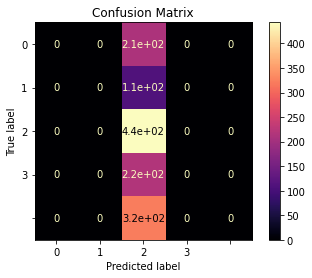

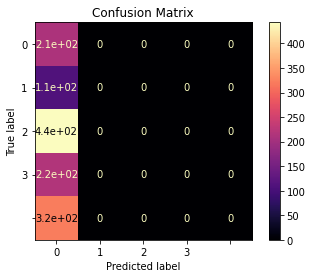

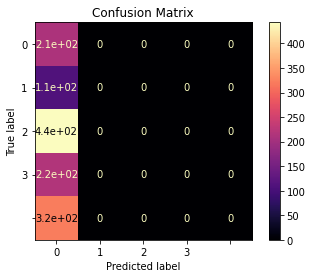

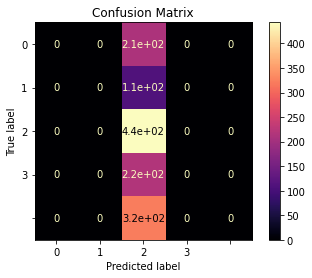

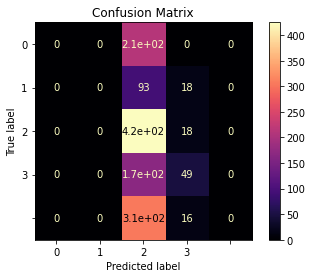

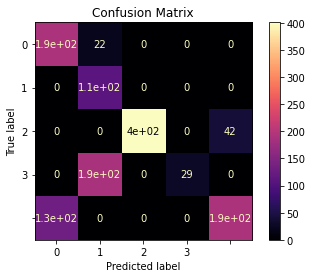

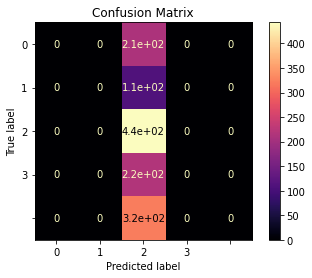

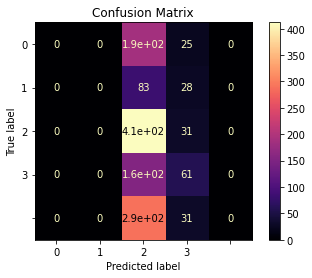

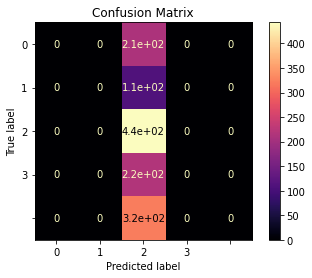

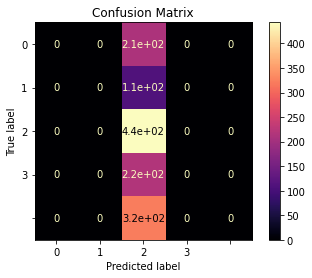

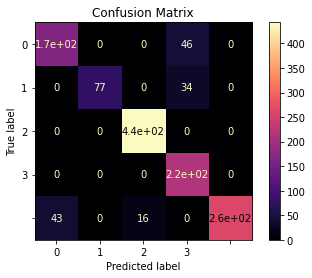

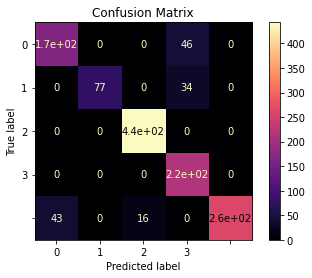

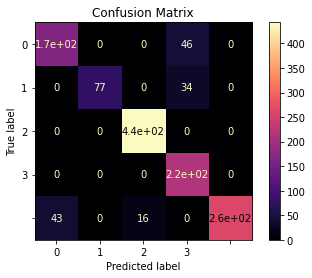

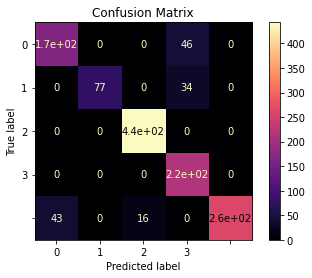

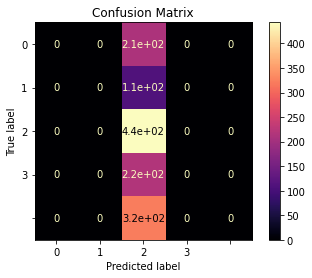

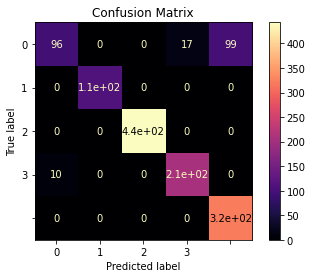

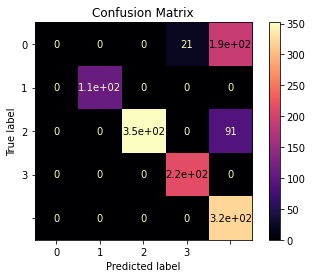

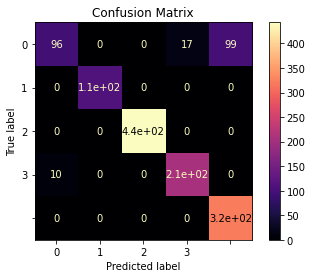

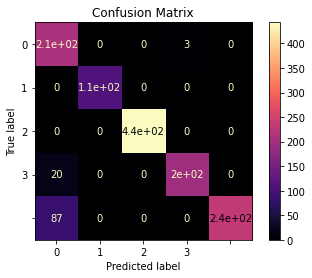

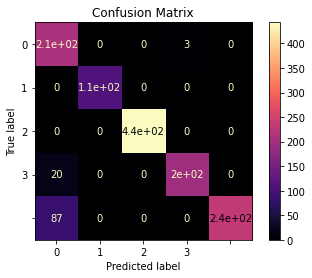

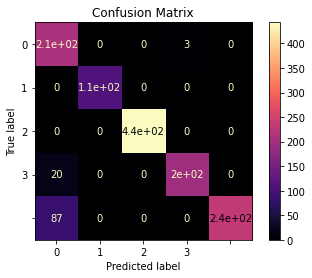

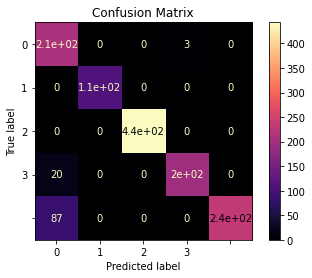

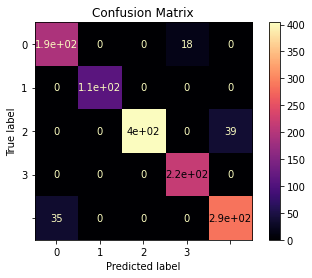

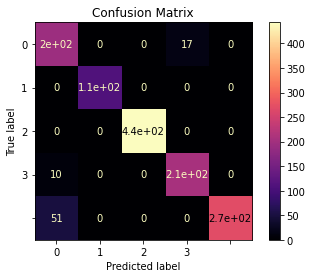

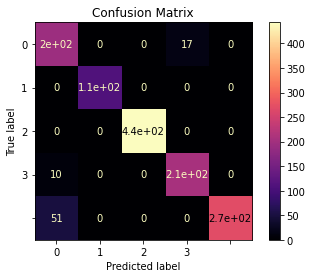

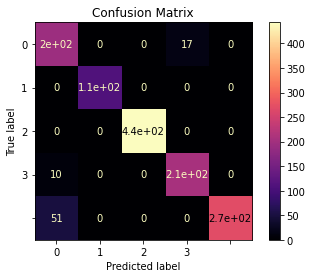

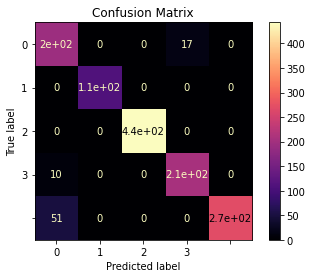

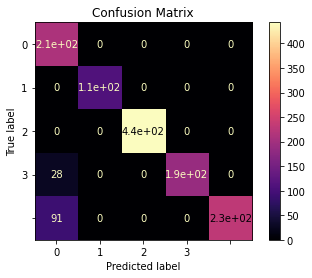

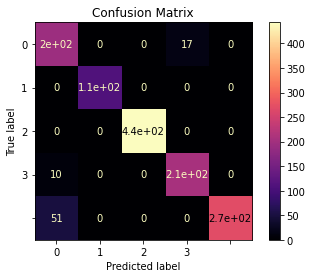

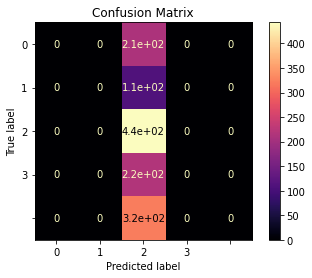

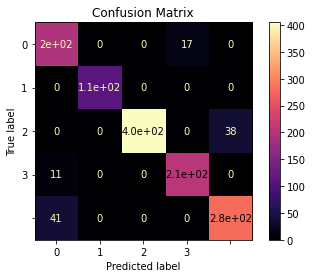

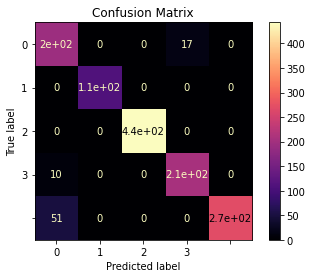

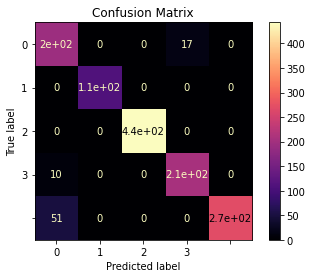

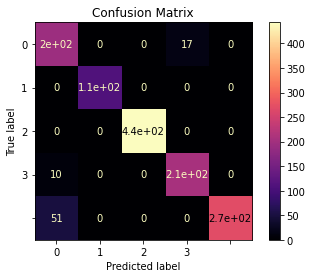

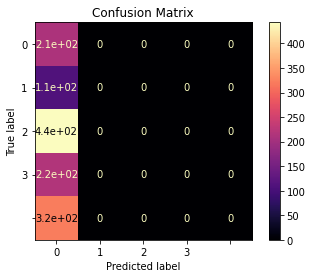

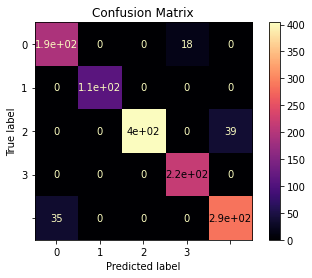

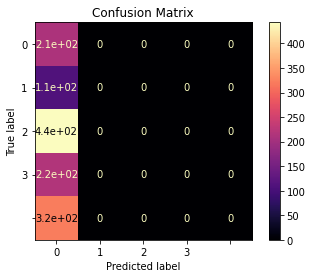

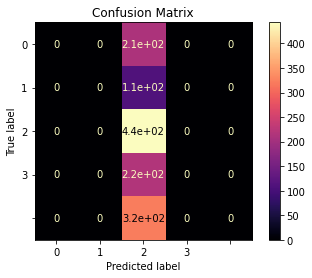

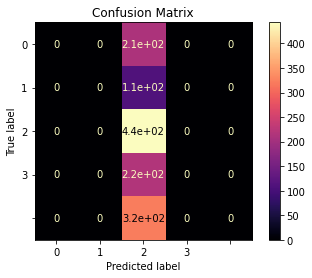

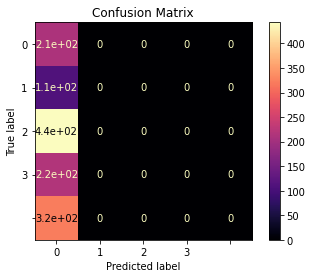

In [ ]:
study_mlp = optuna.create_study(direction='maximize')
study_mlp.optimize(objective_MLP, n_trials=40)
trial_mlp = study_mlp.best_trial
print('MLP - Accuracy: {}'.format(trial_mlp.value))
print("MLP - Best hyperparameters: {}".format(trial_mlp.params))

# Teste com os melhores modelos dos 4 algorimos

1.0

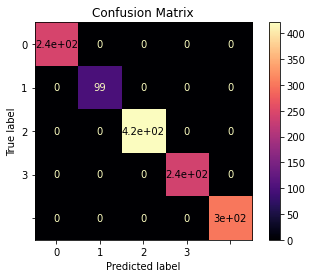

In [ ]:
classifier = RandomForestClassifier

param = trial_RF.params

model_name = 'RF_Test'
run_name = 'RF_Test_model'

accuracy_rf = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_rf

0.9379310344827586

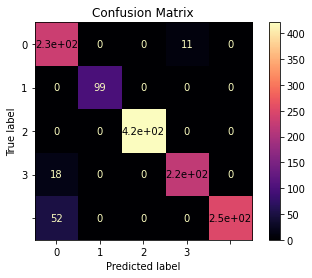

In [ ]:
classifier = MLPClassifier

param = trial_mlp.params
param['random_state'] = 0

model_name = 'MLP_Test'
run_name = 'MLP_Test_model'

accuracy_mlp = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_mlp

0.3522727272727273

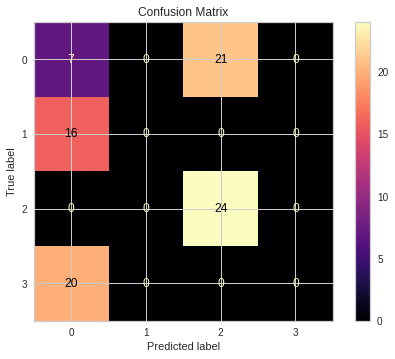

In [ ]:
classifier = LinearSVC

param = trial_svm.params

model_name = 'SVM_Test'
run_name = 'SVM_Test_model'

accuracy_svm = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_svm

## Melhor Modelo - KNN com os parâmetros: 

In [ ]:
trial_knn.params

{'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'uniform'}

1.0

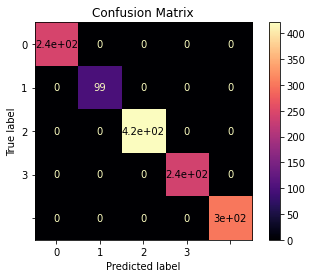

In [ ]:
classifier = KNeighborsClassifier

param = trial_knn.params

model_name = 'KNN_Test'
run_name = 'KNN_Test_model'

accuracy_knn = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_knn

In [ ]:
model = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 3, weights= 'distance')
model.fit(X_train, y_train)
train_predict = model.predict(X_train)
train_acc = accuracy_score(y_train, train_predict)
train_acc

2021/08/16 21:25:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6580c0d0618c483e9330843e87fa4162', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


1.0

## A acurácia no conjunto de treinamento foi igual 100% enquanto nos teste ficou em 100%, o que faz com que não tenhamos mais como melhorar o modelo.

## **Teste usando 'stringency_category' como a classe a ser predita, em cada um dos 5 clusters.**

**Cluster 0**

In [ ]:
df_3 = df_2[df_2.cluster==0]
df_3['stringency_category'] = df_3['stringency_category'].astype('int64')
df_3

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_category,cluster
4370,2129957.0,1434.333333,1294.523667,197211.333333,59.0,65.857,64599.264667,43.501667,39.261333,5981.203667,1.789333,1.997,0.930000,0.000000,32971846.0,25.129,29.1,7.151,4.455,12236.706,85.755,5.95,1.6,76.74,0.777,0,0
4371,2129957.0,1434.333333,1294.523667,197211.333333,59.0,65.857,64599.264667,43.501667,39.261333,5981.203667,1.789333,1.997,0.930000,0.000000,32971846.0,25.129,29.1,7.151,4.455,12236.706,85.755,5.95,1.6,76.74,0.777,0,0
4372,2129957.0,1434.333333,1294.523667,197211.333333,59.0,65.857,64599.264667,43.501667,39.261333,5981.203667,1.789333,1.997,0.930000,0.000000,32971846.0,25.129,29.1,7.151,4.455,12236.706,85.755,5.95,1.6,76.74,0.777,0,0
4373,2129957.0,1434.333333,1294.523667,197211.333333,59.0,65.857,64599.264667,43.501667,39.261333,5981.203667,1.789333,1.997,0.930000,0.000000,32971846.0,25.129,29.1,7.151,4.455,12236.706,85.755,5.95,1.6,76.74,0.777,0,0
4374,2129957.0,1434.333333,1294.523667,197211.333333,59.0,65.857,64599.264667,43.501667,39.261333,5981.203667,1.789333,1.997,0.930000,0.000000,32971846.0,25.129,29.1,7.151,4.455,12236.706,85.755,5.95,1.6,76.74,0.777,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,314480.0,0.000000,751.714000,3733.000000,0.0,12.000,11059.243000,0.000000,26.435000,131.278000,0.000000,0.422,1.040000,97.219997,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,2,0
6520,316449.0,1969.000000,924.000000,3764.000000,31.0,14.000,11128.486000,69.243000,32.494000,132.368000,1.090000,0.492,1.070000,97.220002,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3,0
6521,317334.0,885.000000,910.571000,3781.000000,17.0,14.143,11159.609000,31.123000,32.022000,132.966000,0.598000,0.497,1.070000,97.220000,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3,0
6522,318185.0,851.000000,867.143000,3789.000000,8.0,13.571,11189.536000,29.927000,30.495000,133.247000,0.281000,0.477,1.068325,97.220000,28435943.0,36.253,29.0,6.614,3.915,16745.022,204.850,6.47,0.8,72.06,0.711,3,0


In [ ]:
X = df_3.drop(columns=['stringency_category'], axis=1)
y = df_3['stringency_category']

#20% dos dados para TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#20% dos dados para VALIDAÇÃO (0.25 * 0.8 = 0.2)
#60% dos dados para TREINAMENTO
X_train_val, X_valid, y_train_val, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

**Random Forest**

0.9955156950672646

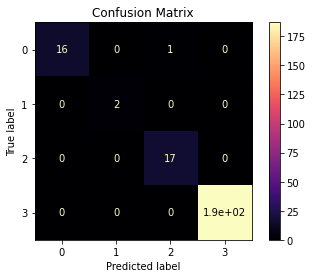

In [ ]:
classifier = RandomForestClassifier

param = trial_RF.params

model_name = 'RF_Test'
run_name = 'RF_Test_model'

accuracy_rf = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_rf

**MLP**

0.8385650224215246

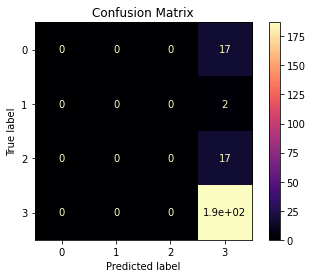

In [ ]:
classifier = MLPClassifier

param = trial_mlp.params
param['random_state'] = 0

model_name = 'MLP_Test'
run_name = 'MLP_Test_model'

accuracy_mlp = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_mlp

**KNN**

0.9820627802690582

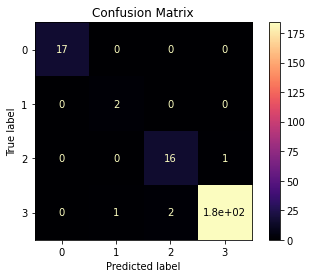

In [ ]:
classifier = KNeighborsClassifier

param = trial_knn.params

model_name = 'KNN_Test'
run_name = 'KNN_Test_model'

accuracy_knn = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_knn

In [ ]:
model = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 3, weights= 'distance')
model.fit(X_train, y_train)
train_predict = model.predict(X_train)
train_acc = accuracy_score(y_train, train_predict)
train_acc

2021/08/16 21:36:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2b986a4a44a44f43934234904bd21a6a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


1.0

**Cluster 1**

In [ ]:
df_3 = df_2[df_2.cluster==1]
df_3['stringency_category'] = df_3['stringency_category'].astype('int64')
df_3

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_category,cluster
1116,1.0,1.0,0.327000,2.427660,1.650547,0.000,0.005,0.005,0.001287,0.011488,0.007729,0.000,2.483878,5.560000,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0,1
1117,1.0,0.0,0.326821,2.428368,1.650884,0.000,0.005,0.000,0.001285,0.011491,0.007730,0.000,2.483852,5.560000,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0,1
1118,1.0,0.0,0.326821,2.428368,1.650884,0.000,0.005,0.000,0.001285,0.011491,0.007730,0.000,2.483852,5.560000,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0,1
1119,2.0,1.0,0.329979,2.426446,1.650079,0.000,0.009,0.005,0.001308,0.011482,0.007727,0.000,2.483831,5.560000,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0,1
1120,2.0,0.0,0.329869,2.427160,1.650419,0.000,0.009,0.000,0.001307,0.011485,0.007728,0.000,2.483804,5.560000,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,20245085.0,32443.0,31221.714000,565748.000000,975.000000,877.286,95244.361,152.630,146.885000,2661.599000,4.587000,4.127,0.890000,56.940000,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,1,1
1649,20285067.0,39982.0,31211.429000,566896.000000,1148.000000,884.286,95432.459,188.098,146.836000,2667.000000,5.401000,4.160,0.890000,56.940001,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,1,1
1650,20319000.0,33933.0,30036.286000,567862.000000,966.000000,871.429,95592.099,159.640,141.308000,2671.545000,4.545000,4.100,0.890000,56.940001,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,1,1
1651,20350142.0,31142.0,28337.571000,568788.000000,926.000000,862.286,95738.608,146.510,133.316000,2675.901000,4.356000,4.057,0.890000,56.940000,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,1,1


In [ ]:
X = df_3.drop(columns=['stringency_category'], axis=1)
y = df_3['stringency_category']

#20% dos dados para TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#20% dos dados para VALIDAÇÃO (0.25 * 0.8 = 0.2)
#60% dos dados para TREINAMENTO
X_train_val, X_valid, y_train_val, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

**Random Forest**

0.9629629629629629

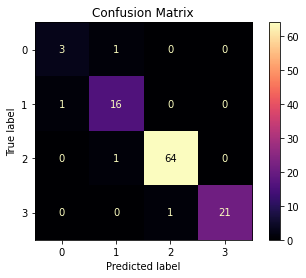

In [ ]:
classifier = RandomForestClassifier

param = trial_RF.params

model_name = 'RF_Test'
run_name = 'RF_Test_model'

accuracy_rf = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_rf

**MLP**

0.6944444444444444

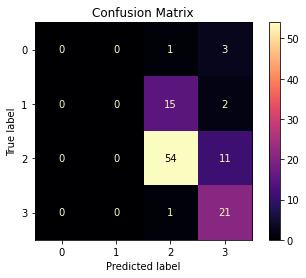

In [ ]:
classifier = MLPClassifier

param = trial_mlp.params
param['random_state'] = 0

model_name = 'MLP_Test'
run_name = 'MLP_Test_model'

accuracy_mlp = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_mlp

**KNN**

0.9351851851851852

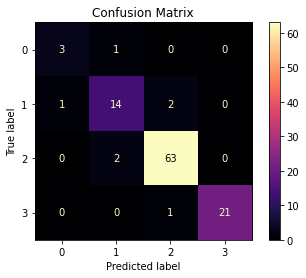

In [ ]:
classifier = KNeighborsClassifier

param = trial_knn.params

model_name = 'KNN_Test'
run_name = 'KNN_Test_model'

accuracy_knn = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_knn

**Cluster 2**

In [ ]:
df_3 = df_2[df_2.cluster==2]
df_3['stringency_category'] = df_3['stringency_category'].astype('int64')
df_3

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_category,cluster
3254,4043.666468,52.666664,42.666665,77.33333,0.666667,0.571333,6892.997328,89.777996,72.731663,131.82566,1.136333,0.974,1.193333,75.306663,3483.0,3.612,29.599999,6.933,4.229,13767.118323,258.313987,12.539999,3.1,81.44,0.738,2,2
3255,4043.666468,52.666664,42.666665,77.33333,0.666667,0.571333,6892.997328,89.777996,72.731663,131.82566,1.136333,0.974,1.193333,75.306663,3483.0,3.612,29.599999,6.933,4.229,13767.118323,258.313987,12.539999,3.1,81.44,0.738,2,2
3256,4043.666468,52.666664,42.666665,77.33333,0.666667,0.571333,6892.997328,89.777996,72.731663,131.82566,1.136333,0.974,1.193333,75.306663,3483.0,3.612,29.599999,6.933,4.229,13767.118323,258.313987,12.539999,3.1,81.44,0.738,2,2
3257,4043.666468,52.666664,42.666665,77.33333,0.666667,0.571333,6892.997328,89.777996,72.731663,131.82566,1.136333,0.974,1.193333,75.306663,3483.0,3.612,29.599999,6.933,4.229,13767.118323,258.313987,12.539999,3.1,81.44,0.738,2,2
3258,4043.666468,52.666664,42.666665,77.33333,0.666667,0.571333,6892.997328,89.777996,72.731663,131.82566,1.136333,0.974,1.193333,75.306663,3483.0,3.612,29.599999,6.933,4.229,13767.118323,258.313987,12.539999,3.1,81.44,0.738,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,382873.000000,152.000000,125.571000,5991.00000,1.000000,1.714000,110219.657000,43.757000,36.149000,1724.66100,0.288000,0.494,0.750000,55.559998,3473727.0,19.751,35.600000,14.655,10.361,20551.409000,160.708000,6.930000,2.8,77.91,0.817,0,2
6000,382997.000000,124.000000,120.286000,5996.00000,5.000000,2.000000,110255.354000,35.697000,34.627000,1726.10000,1.439000,0.576,0.740000,55.559998,3473727.0,19.751,35.600000,14.655,10.361,20551.409000,160.708000,6.930000,2.8,77.91,0.817,0,2
6001,383101.000000,104.000000,115.143000,5998.00000,2.000000,1.714000,110285.293000,29.939000,33.147000,1726.67600,0.576000,0.494,0.740000,55.559999,3473727.0,19.751,35.600000,14.655,10.361,20551.409000,160.708000,6.930000,2.8,77.91,0.817,0,2
6002,383212.000000,111.000000,121.714000,6001.00000,3.000000,2.143000,110317.247000,31.954000,35.039000,1727.53900,0.864000,0.617,0.740775,55.559999,3473727.0,19.751,35.600000,14.655,10.361,20551.409000,160.708000,6.930000,2.8,77.91,0.817,0,2


In [ ]:
X = df_3.drop(columns=['stringency_category'], axis=1)
y = df_3['stringency_category']

#20% dos dados para TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#20% dos dados para VALIDAÇÃO (0.25 * 0.8 = 0.2)
#60% dos dados para TREINAMENTO
X_train_val, X_valid, y_train_val, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

**Random Forest**

0.9861111111111112

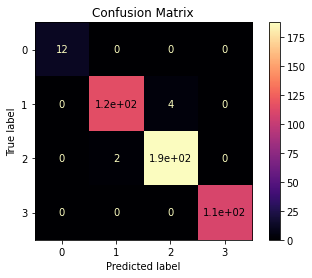

In [ ]:
classifier = RandomForestClassifier

param = trial_RF.params

model_name = 'RF_Test'
run_name = 'RF_Test_model'

accuracy_rf = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_rf

**MLP**

0.5231481481481481

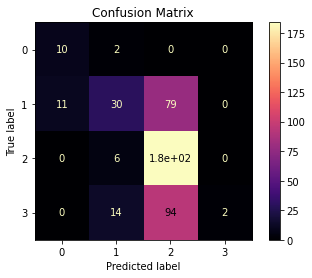

In [ ]:
classifier = MLPClassifier

param = trial_mlp.params
param['random_state'] = 0

model_name = 'MLP_Test'
run_name = 'MLP_Test_model'

accuracy_mlp = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_mlp

**KNN**

0.9421296296296297

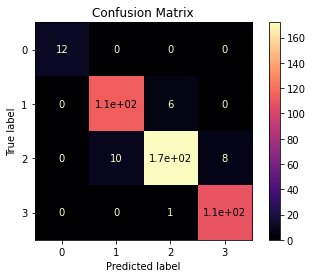

In [ ]:
classifier = KNeighborsClassifier

param = trial_knn.params

model_name = 'KNN_Test'
run_name = 'KNN_Test_model'

accuracy_knn = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_knn

**Cluster 3**

In [ ]:
df_3 = df_2[df_2.cluster==3]
df_3['stringency_category'] = df_3['stringency_category'].astype('int64')
df_3

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_category,cluster
0,5.077265e+06,7759.666667,10035.476333,108848.666667,135.666667,226.762000,112339.374667,171.690000,222.044667,2408.381333,3.001667,5.017333,0.883333,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.00,76.67,0.845,0,3
1,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.00,76.67,0.845,0,3
2,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.00,76.67,0.845,0,3
3,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.00,76.67,0.845,0,3
4,5.053541e+06,12392.666667,11129.809667,108374.000000,202.666667,233.571667,111814.458333,274.199667,246.258000,2397.879000,4.484333,5.168000,0.886667,0.000000,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,5.00,76.67,0.845,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,4.852323e+06,5368.000000,5322.857000,122953.000000,185.000000,179.714000,95362.578000,105.497000,104.610000,2416.392000,3.636000,3.532000,0.640000,62.040000,50882884.0,44.223,32.2,7.646,4.312,13254.949,124.240,7.44,1.71,77.29,0.767,2,3
2717,4.856595e+06,4272.000000,4998.857000,123097.000000,144.000000,171.143000,95446.536000,83.958000,98.242000,2419.222000,2.830000,3.363000,0.630000,62.040002,50882884.0,44.223,32.2,7.646,4.312,13254.949,124.240,7.44,1.71,77.29,0.767,2,3
2718,4.860622e+06,4027.000000,4577.000000,123221.000000,124.000000,162.000000,95525.678000,79.143000,89.952000,2421.659000,2.437000,3.184000,0.630000,62.040002,50882884.0,44.223,32.2,7.646,4.312,13254.949,124.240,7.44,1.71,77.29,0.767,2,3
2719,4.864629e+06,4007.000000,4285.000000,123356.000000,135.000000,154.143000,95604.428000,78.749000,84.213000,2424.312000,2.653000,3.029000,0.630773,62.040001,50882884.0,44.223,32.2,7.646,4.312,13254.949,124.240,7.44,1.71,77.29,0.767,2,3


In [ ]:
X = df_3.drop(columns=['stringency_category'], axis=1)
y = df_3['stringency_category']

#20% dos dados para TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#20% dos dados para VALIDAÇÃO (0.25 * 0.8 = 0.2)
#60% dos dados para TREINAMENTO
X_train_val, X_valid, y_train_val, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

**Random Forest**

0.9955555555555555

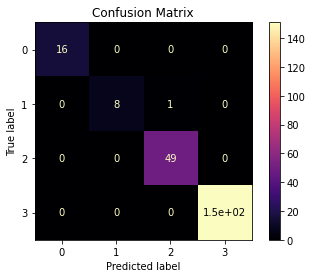

In [ ]:
classifier = RandomForestClassifier

param = trial_RF.params

model_name = 'RF_Test'
run_name = 'RF_Test_model'

accuracy_rf = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_rf

**MLP**

0.7955555555555556

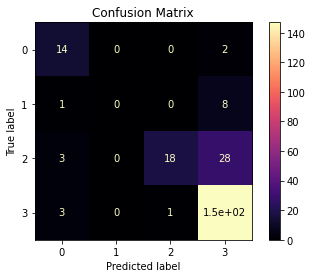

In [ ]:
classifier = MLPClassifier

param = trial_mlp.params
param['random_state'] = 0

model_name = 'MLP_Test'
run_name = 'MLP_Test_model'

accuracy_mlp = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_mlp

**KNN**

0.9866666666666667

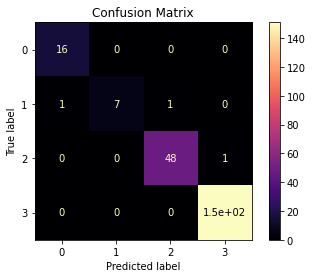

In [ ]:
classifier = KNeighborsClassifier

param = trial_knn.params

model_name = 'KNN_Test'
run_name = 'KNN_Test_model'

accuracy_knn = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_knn

**Cluster 4**

In [ ]:
df_3 = df_2[df_2.cluster==4]
df_3['stringency_category'] = df_3['stringency_category'].astype('int64')
df_3

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_category,cluster
593,2.0,2.0,1.538350,3.391345,1.931457,0.000,0.171,0.171,0.132011,0.290764,0.165498,0.000,1.216066,5.56,11673029.0,10.202,25.4,6.704,4.393,6885.829,204.299,6.89,1.1,71.51,0.718,0,4
594,2.0,0.0,1.547228,3.313457,1.907167,0.000,0.171,0.000,0.132824,0.284095,0.163427,0.000,1.215949,30.56,11673029.0,10.202,25.4,6.704,4.393,6885.829,204.299,6.89,1.1,71.51,0.718,1,4
595,3.0,1.0,1.557057,3.263920,1.891716,0.000,0.257,0.086,0.133724,0.279854,0.162109,0.000,1.215881,44.44,11673029.0,10.202,25.4,6.704,4.393,6885.829,204.299,6.89,1.1,71.51,0.718,1,4
596,10.0,7.0,1.558870,3.248475,1.889725,0.000,0.857,0.600,0.133890,0.278532,0.161941,0.000,1.215850,44.44,11673029.0,10.202,25.4,6.704,4.393,6885.829,204.299,6.89,1.1,71.51,0.718,1,4
597,10.0,0.0,1.562001,3.245281,1.885970,0.000,0.857,0.000,0.134176,0.278259,0.161620,0.000,1.215850,44.44,11673029.0,10.202,25.4,6.704,4.393,6885.829,204.299,6.89,1.1,71.51,0.718,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,491831.0,0.0,391.714000,31788.000000,0.000000,13.429,27876.740,0.000,22.202000,1801.728000,0.000000,0.761,0.760000,49.07,17643060.0,66.939,28.1,7.104,4.458,10581.936,140.448,5.55,1.5,77.01,0.759,1,4
3250,493767.0,1936.0,487.286000,31870.000000,82.000000,16.571,27986.472,109.732,27.619000,1806.376000,4.648000,0.939,0.780000,49.07,17643060.0,66.939,28.1,7.104,4.458,10581.936,140.448,5.55,1.5,77.01,0.759,1,4
3251,493767.0,0.0,368.857000,31870.000000,0.000000,13.714,27986.472,0.000,20.907000,1806.376000,0.000000,0.777,0.770000,49.07,17643060.0,66.939,28.1,7.104,4.458,10581.936,140.448,5.55,1.5,77.01,0.759,1,4
3252,493767.0,0.0,368.857000,31870.000000,0.000000,13.714,27986.472,0.000,20.907000,1806.376000,0.000000,0.777,0.770000,49.07,17643060.0,66.939,28.1,7.104,4.458,10581.936,140.448,5.55,1.5,77.01,0.759,1,4


In [ ]:
X = df_3.drop(columns=['stringency_category'], axis=1)
y = df_3['stringency_category']

#20% dos dados para TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#20% dos dados para VALIDAÇÃO (0.25 * 0.8 = 0.2)
#60% dos dados para TREINAMENTO
X_train_val, X_valid, y_train_val, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

**Random Forest**

0.984375

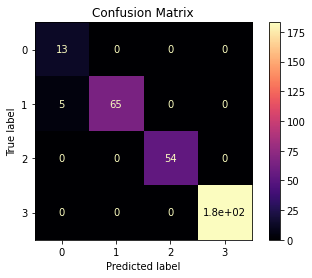

In [ ]:
classifier = RandomForestClassifier

param = trial_RF.params

model_name = 'RF_Test'
run_name = 'RF_Test_model'

accuracy_rf = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_rf

**MLP**

0.2875

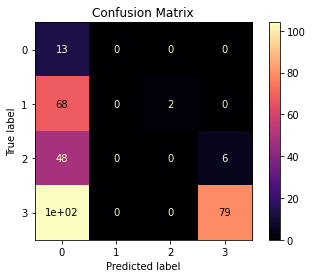

In [ ]:
classifier = MLPClassifier

param = trial_mlp.params
param['random_state'] = 0

model_name = 'MLP_Test'
run_name = 'MLP_Test_model'

accuracy_mlp = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_mlp

**KNN**

0.971875

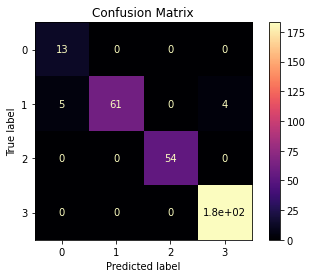

In [ ]:
classifier = KNeighborsClassifier

param = trial_knn.params

model_name = 'KNN_Test'
run_name = 'KNN_Test_model'

accuracy_knn = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_knn

## **Agora vamos testar para os dados com todos os clusters**

In [ ]:
df_2['stringency_category'] = df_2['stringency_category'].astype('int64')

X = df_2.drop(columns=['stringency_category'], axis=1)
y = df_2['stringency_category']

#20% dos dados para TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#20% dos dados para VALIDAÇÃO (0.25 * 0.8 = 0.2)
#60% dos dados para TREINAMENTO
X_train_val, X_valid, y_train_val, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

**Random Forest**

0.9915708812260536

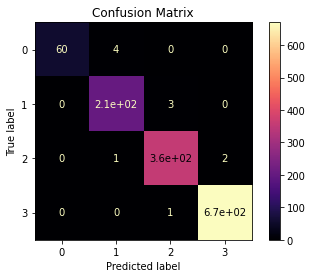

In [ ]:
classifier = RandomForestClassifier

param = trial_RF.params

model_name = 'RF_Test'
run_name = 'RF_Test_model'

accuracy_rf = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_rf

**MLP**

0.32720306513409964

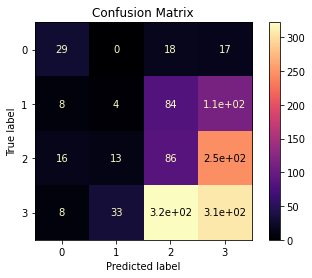

In [ ]:
classifier = MLPClassifier

param = trial_mlp.params
param['random_state'] = 0

model_name = 'MLP_Test'
run_name = 'MLP_Test_model'

accuracy_mlp = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_mlp

**KNN**

0.960919540229885

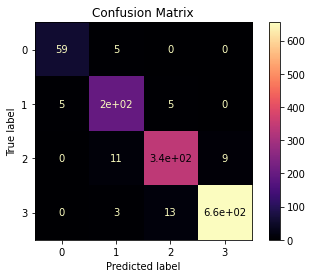

In [ ]:
classifier = KNeighborsClassifier

param = trial_knn.params

model_name = 'KNN_Test'
run_name = 'KNN_Test_model'

accuracy_knn = model_experimentation(classifier, param, model_name, run_name, X_test, y_test)
accuracy_knn